<a href="https://colab.research.google.com/github/AutomatonDuck/python_programming/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 3

###Question 1

Iteration #0


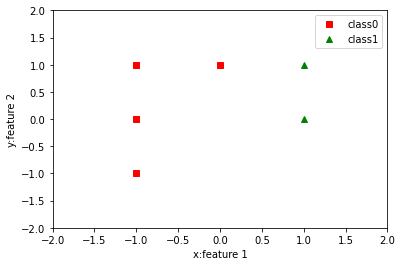

Iteration #0


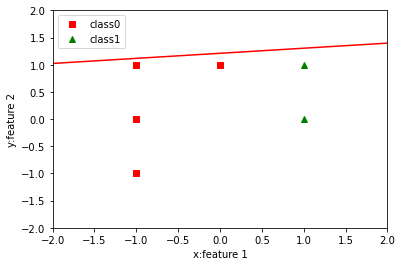

Iteration #0


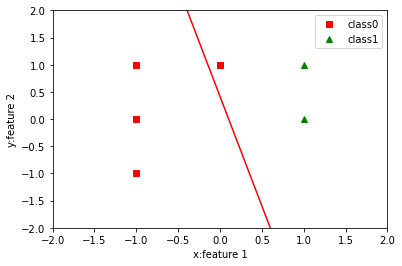

Iteration #1


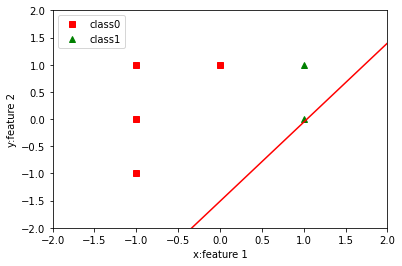

Iteration #2


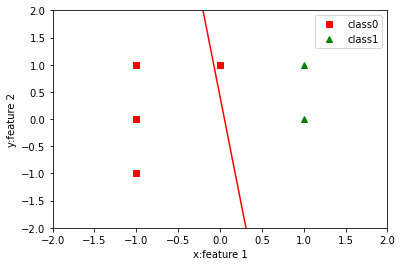

Iteration #2


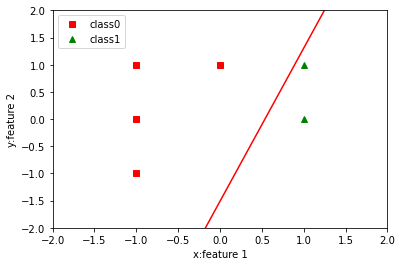

*********************
New Data points:
[[ 2  0  1]
 [ 2  1  0]
 [ 0  0  1]
 [-2  0  0]]
*********************

*********************
Classification for new points: 
[[1]
 [1]
 [0]
 [0]]
*******************



In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class NeuralNetwork(object):

  def __init__(self):
    self.weight_matrix = 2 * np.random.random((3,1)) -1
    self.l_rate=1


  
  def hard_limiter(self, x):
    outs=np.zeros(x.shape)
    outs[x>0]=1 ##logical indexing
    return outs

  def forward_propegation(self,inputs):
    outs=np.dot(inputs, self.weight_matrix) ##matrix multiplication
    return self.hard_limiter(outs)

  def pred(self,inputs):
    prob=self.forward_propegation(inputs)
    preds=np.int8(prob>=0.5)
    return preds
  
  def train(self, train_inputs, train_outputs, num_train_iterations=100):
    for iteration in range(num_train_iterations):
      for i in range(train_inputs.shape[0]):
        pred_i = self.pred(train_inputs[i,:])
        if pred_i != train_outputs[i]:
          output = self.forward_propegation(train_inputs[i,:])
          error = train_outputs[i] - output
          adjustment = self.l_rate*error*train_inputs[i]
          self.weight_matrix[:,0] += adjustment
          print('Iteration #'+str(iteration))
          plot_fun_thr(train_inputs[:,0:2],train_outputs, self.weight_matrix[:,0],classes)

def plot_fun_thr(features,labels,thre_parms,classes):
  plt.plot(features[labels[:]==classes[0],0], features[labels[:]==classes[0],1]
             , 'rs', features[labels[:]==classes[1],0],
             features[labels[:]==classes[1],1], 'g^')
  plt.axis([-2,2,-2,2])
  x1 = np.linspace(-2,2,50)
  x2 = -(thre_parms[0]*x1+thre_parms[2]) /thre_parms[1]
  plt.plot(x1,x2, '-r')
  plt.xlabel('x:feature 1')
  plt.ylabel('y:feature 2')
  plt.legend(['class'+str(classes[0]), 'class'+str(classes[1])])
  plt.show()
  

features = np.array([[1,1],[1,0],[0,1],[-1,-1],[-1,0],[-1,1]])
#print(features)
label = np.array([1,1,0,0,0,0])
#print(label)
classes = [0,1]

bias=np.ones((features.shape[0],1))
features = np.append(features,bias,axis=1)

#plot_fun(features,label,classes)

new_points = np.array([[2,0,1],[2,1,0], [0,0,1], [-2,0,0]])

neural_network = NeuralNetwork()
#print(neural_network.weight_matrix)
neural_network.train(features, label, 10)
#print(neural_network.pred(features))
print("*********************\nNew Data points:\n" + str(new_points) +"\n*********************\n")
print("*********************\nClassification for new points: \n"+ str(neural_network.pred(new_points))+"\n*******************\n")



###Question 3

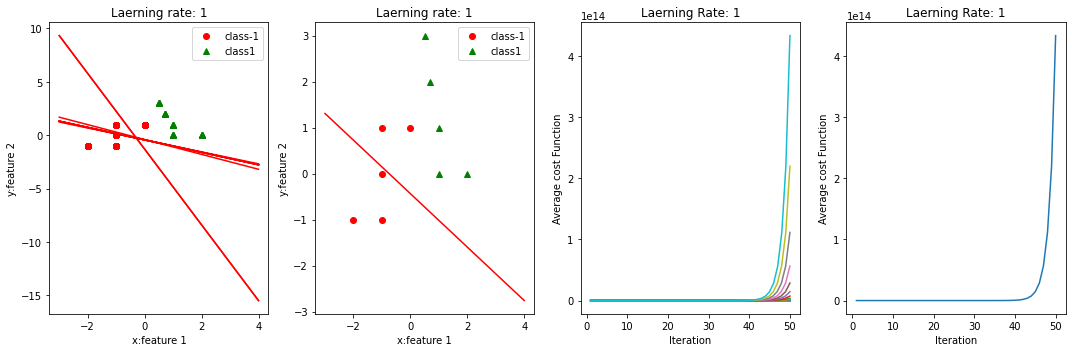

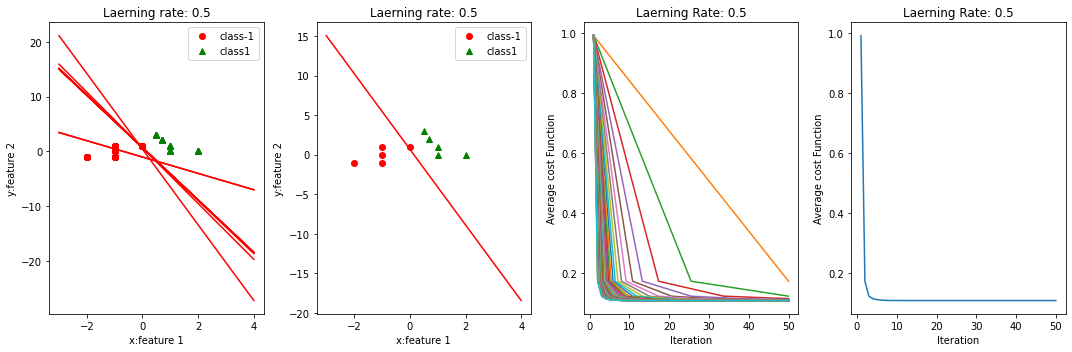

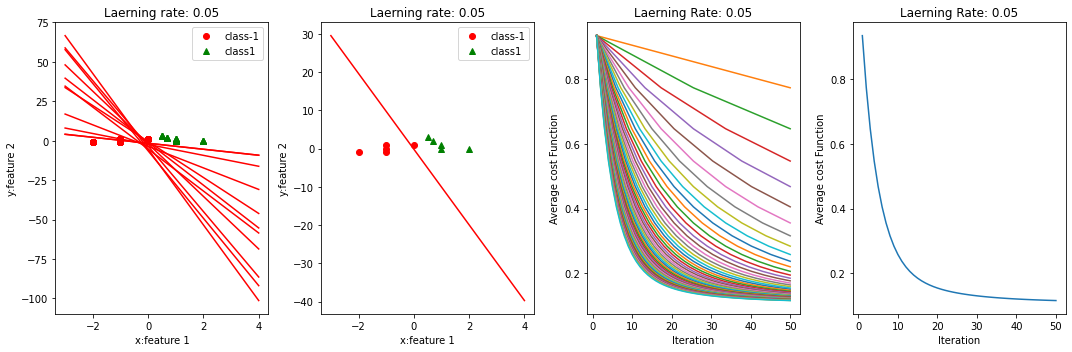

In [35]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork(object):

  def __init__(self, l_rate):
    self.weight_matrix = 2 * np.random.rand(3) -1
    self.l_rate = l_rate
    self.prev_w = [self.weight_matrix]
    self.cost_history = []
  
  
  def forward_propegation(self,data):
    return np.dot(data, self.weight_matrix) ##matrix multiplication
    

  
  def train(self, train_inputs, train_outputs, epochs=10):
    i = 0
    error = []
    error_sqd = []
    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    N = train_inputs.shape[0]

    plot_fun_thr2(axs[0],train_inputs,train_outputs, self.weight_matrix,self.l_rate, classes)
    for iteration in range(epochs):
      if iteration % 5 == 0:
         plot_fun_thr2(axs[0],train_inputs,train_outputs, self.weight_matrix,self.l_rate, classes)

      for data in train_inputs:
        outputs = self.forward_propegation(data)
        error.append(np.dot(train_outputs[i] - outputs, data))
        error_sqd.append(np.square(train_outputs[i] - outputs))
        i = i + 1

        if i == N:
          weights_new = np.zeros(shape=self.weight_matrix.shape)
          for j in range(weights_new.shape[0]):
            weights_new[j] = (self.l_rate / N) * np.sum(np.asarray(error)[:,j])
          self.weight_matrix = np.add(self.weight_matrix,weights_new)
          self.prev_w.append(self.weight_matrix)
          self.cost_history.append((1/ (2*N) * np.sum(error_sqd)))
          learning_curve(axs[2], np.asarray(self.cost_history), self.l_rate, epochs)
      
      i = 0
      error.clear()
      error_sqd.clear()
    plot_fun_thr2(axs[1],train_inputs,train_outputs, self.weight_matrix,self.l_rate, classes)
    learning_curve(axs[3], np.asarray(self.cost_history), self.l_rate, epochs)

    plt.tight_layout()
    plt.show
      #adjustment = (self.l_rate/N) * np.sum(np.multiply(error,train_inputs),axis=0)
      #self.weight_matrix[:,0] += adjustment
      #print(np.sum(np.multiply(error,train_inputs),axis=0)) #axis = 0 sums up first column
      #print(adjustment.shape)
          
  
       
  
def plot_fun_thr2(axs, features,labels,thre_parms, l_rate, classes):
  colors = ['ro', 'g^']

  for i in range(len(classes)):
    axs.plot(features[labels[:]==classes[i],0], features[labels[:]==classes[i],1], colors[i])
  #plt.axis([-3,4,-3,4])
  x1 = np.linspace(-3,4,50)
  x2 = -(thre_parms[0]*x1+thre_parms[2]) /thre_parms[1]
  axs.plot(x1,x2, '-r')
  axs.set_xlabel('x:feature 1')
  axs.set_ylabel('y:feature 2')
  axs.legend(['class'+str(classes[0]), 'class'+str(classes[1])])
  axs.set_title("Laerning rate: {}".format(l_rate))

def learning_curve(axs, cost, l_rate, epochs):
  x = np.linspace(1, epochs, cost.shape[0])
  axs.plot(x, cost)
  axs.set_xlabel("Iteration")
  axs.set_ylabel("Average cost Function")
  axs.set_title("Laerning Rate: {}".format(l_rate))

features = np.array([[1,1],[1,0],[0,1],[-1,-1],[0.5,3],[0.7,2],[-1,0],[-1,1],[2,0],[-2,-1]])
#print(features)
label = np.array([1,1,-1,-1,1,1,-1,-1,1,-1])
#print(label)
classes = [-1,1]

bias=np.ones((features.shape[0],1))
features = np.append(features,bias,axis=1)

#print(features.shape)
#print(bias.shape)

neural_network = NeuralNetwork(1)
neural_network.train(features,label,50)
neural_network = NeuralNetwork(0.5)
neural_network.train(features,label,50)
neural_network = NeuralNetwork(0.05)
neural_network.train(features,label,50)


With higher learning weights the errors can diverge as shown by the graph above. As the learning rate drops it slows the rate in which it converges. At 0.5 it converges  in less then 10 iterations to close to zero (NOT ZERO) ands then stops training. At 0.05 the rate of covergence is much slower, but the network trains for longer, and thus will be more accurate. Lower learning rates will give more accurate results in most instances it appears, although local minima can trap a network with a low learning rate. Lower learning rates will also be more computationally expensive. The best learning rate would be a balanced one, that will allow for accurate results, whilstt avoiding the traps of local minima and expensive computations.